# 2013 HHS Delft priva Dataset (SmartGridAI)
Used for general data analysis and get first try training data

## Data Analysis and transformation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Fun fact

Loading time xlsx version into pandas (not cached): 6m 44.4s

Loading time xlsx version into pandas (cached): 1m 46.6s

Loading time csv version into pandas: > 10s

### Load data

In [2]:
df = pd.read_csv('../data/2013_HHS_Delft_priva_16min.csv', sep=',')
# df = pd.read_excel('../data/2013_HHS_Delft_priva_16min.xlsx')

In [3]:
df.head()

,Unnamed: 0,Datum (d/M/yyyy),Tijd,Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average,Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average,WB Watertemperatuur<Ha_ho_de OS1 GRFMET 5> average,WB Niveau<Ha_ho_de OS1 GRFMET 4> average,WB Leidingdruk - PT 02.02<Ha_ho_de OS1 GRFMET 3> average,WB Debiet grondwater<Ha_ho_de OS1 GRFMET 11> average,WB Bronpomp (status) - WB Bronpomp - CP 02.02<Ha_ho_de OS1 GRFSYS 40> average,...,Aanv.temp. TSA CV - TT 02.02<Ha_ho_de OS1 GRFMET 1> average,Aanv.temp. parkeerdek - TT 14.09<Ha_ho_de OS3 GRFMET 60> average,Aanv.temp. na ketel - TT 28.02<Ha_ho_de OS3 GRFMET 9> average,Aanv.temp. hellingbaan - TT 14.07<Ha_ho_de OS3 GRFMET 58> average,Aanv.temp. GKW verdeler - TT 29.07<Ha_ho_de OS2 GRFMET 13> average,Aanv.temp. GKW verdeler - TT 29.05<Ha_ho_de OS3 GRFMET 21> average,Aanv.temp. GKW MER - TT48.01<Ha_ho_de OS1 GRFMET 2> average,Aanv.temp. GKW - TT 29.02<Ha_ho_de OS1 GRFMET 28> average,Aanv.temp. CV verdeler - TT 28.06<Ha_ho_de OS2 GRFMET 11> average,Aanv.temp. CV verdeler - TT 28.04<Ha_ho_de OS3 GRFMET 19> average
0,0,2013-01-01,00:00:00,0.0,0.0,133.0,61.0,27.0,0.0,6.0,...,138.0,176.0,187.0,176.0,212.0,197.0,146.0,147.0,213.0,205.0
1,1,2013-01-01,00:16:00,0.0,0.0,135.0,61.0,26.0,0.0,6.0,...,138.0,176.0,187.0,176.0,212.0,197.0,151.0,152.0,212.0,205.0
2,2,2013-01-01,00:32:00,0.0,0.0,136.0,61.0,25.0,0.0,6.0,...,138.0,176.0,186.0,176.0,212.0,197.0,156.0,159.0,212.0,205.0
3,3,2013-01-01,00:48:00,0.0,0.0,137.0,61.0,24.0,0.0,6.0,...,139.0,176.0,186.0,175.0,212.0,197.0,164.0,168.0,212.0,204.0
4,4,2013-01-01,01:04:00,0.0,0.0,125.0,69.0,21.0,200.0,6.0,...,125.0,176.0,186.0,175.0,212.0,197.0,173.0,169.0,212.0,204.0


In [5]:
# Only drop 'Unnamed 0' column
df = df.drop(df.columns[0], axis=1)

### Filter out columns that have a higher amount of NaN values than normal.

In [21]:
# In general, columns have default a NaN count of 745
# Check columns that contain a NaN sum higher than 745

max_count = 745

for column in df:
    col_index = df.columns.get_loc(column)
    col_nan_count = df[column].isna().sum()

    if (col_nan_count > 745):
        print(col_index, " | ", column, " ", col_nan_count)

16  |  Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average   2059
45  |  Tijdprog. LBK Zuid<Ha_ho_de OS2 GRFBUF 10> average   1079
46  |  Tijdprog. LBK Noord<Ha_ho_de OS3 GRFBUF 15> average   1079
131  |  Grondwaterverplaatsing uur - Registratie Ontladen<Ha_ho_de OS1 TABSYS 63> average   24093
132  |  Grondwaterverplaatsing uur - Registratie Laden<Ha_ho_de OS1 TABSYS 38> average   24093
133  |  Grondwaterverplaatsing maand - Registratie Ontlade<Ha_ho_de OS1 TABSYS 68> average   32840
134  |  Grondwaterverplaatsing maand - Registratie Laden<Ha_ho_de OS1 TABSYS 43> average   32840
139  |  Gewenste uittredetemp. condensor - Regelw. condens<Ha_ho_de OS1 GRFSYS 182> average   2059
142  |  Gew.gemid. onttr.temp. warme bron uur - Registrati<Ha_ho_de OS1 TABSYS 23> average   24093
143  |  Gew.gemid. onttr.temp. warme bron maand - Registra<Ha_ho_de OS1 TABSYS 28> average   32840
144  |  Gew.gemid. onttr.temp. koude bron uur - Registrati<Ha_ho_de OS1 TABSYS 48> average   2

Create 'Timestamp' column for timeseries forecasting

In [6]:
df['Timestamp'] = df['Datum (d/M/yyyy)'] + ' ' + df['Tijd']

In [7]:
df['Timestamp'].head()

0    2013-01-01 00:00:00
1    2013-01-01 00:16:00
2    2013-01-01 00:32:00
3    2013-01-01 00:48:00
4    2013-01-01 01:04:00
Name: Timestamp, dtype: object

In [8]:
df.columns.values

array(['Datum (d/M/yyyy)', 'Tijd',
       'Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average',
       'Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average',
       'WB Watertemperatuur<Ha_ho_de OS1 GRFMET 5> average',
       'WB Niveau<Ha_ho_de OS1 GRFMET 4> average',
       'WB Leidingdruk - PT 02.02<Ha_ho_de OS1 GRFMET 3> average',
       'WB Debiet grondwater<Ha_ho_de OS1 GRFMET 11> average',
       'WB Bronpomp (status) - WB Bronpomp - CP 02.02<Ha_ho_de OS1 GRFSYS 40> average',
       'Waterdruk transportgr. - PdT 29.02<Ha_ho_de OS1 GRFMET 23> average',
       'Waterdruk transportgr. - PdT 29.01<Ha_ho_de OS1 GRFMET 19> average',
       'Waterdruk transportgr. - PdT 28.02<Ha_ho_de OS3 GRFMET 17> average',
       'Waterdruk transportgr. - PdT 28.01<Ha_ho_de OS3 GRFMET 13> average',
       'Warmtewiel percentage - Warmtewiel - WW 30.02<Ha_ho_de OS2 GRFSYS 132> average',
       'Warmtewiel percentage - Warmtewiel - WW 30.01<Ha_ho_de OS3 GRFSYS 26> average',
       'Warmtevraag 1e trap - Aanv.temp

In [9]:
columns = [
    'Timestamp',
    'Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average',
    'Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average',
    'Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average',
    'Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average',
    'Koelvraag<Ha_ho_de OS3 GRFSYS 81> average',
    'Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average',
    'Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average',
    'Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average',
    'Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average',
    'Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average',
]

targets = [
    'Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average',
    'Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average',
]

features = [
    'Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average',
    'Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average',
    'Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average',
    'Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average',
    'Koelvraag<Ha_ho_de OS3 GRFSYS 81> average',
    'Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average',
    'Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average',
    'Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average',
]

Create dataframe with the defined columns

In [10]:
dft = df[columns]

In [11]:
dft.head()

,Timestamp,Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average,Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average,Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average,Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average,Koelvraag<Ha_ho_de OS3 GRFSYS 81> average,Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average,Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average,Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average,Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average,Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average
0,2013-01-01 00:00:00,0.0,0.0,NaN,0.0,0.0,204.0,457.0,957.0,94.0,3.0
1,2013-01-01 00:16:00,0.0,0.0,NaN,0.0,0.0,204.0,457.0,960.0,93.0,3.0
2,2013-01-01 00:32:00,0.0,0.0,NaN,0.0,0.0,204.0,456.0,963.0,92.0,3.0
3,2013-01-01 00:48:00,0.0,0.0,NaN,0.0,0.0,204.0,455.0,969.0,92.0,3.0
4,2013-01-01 01:04:00,0.0,0.0,NaN,0.0,0.0,205.0,453.0,973.0,91.0,3.0


### Check NaN values in dataset

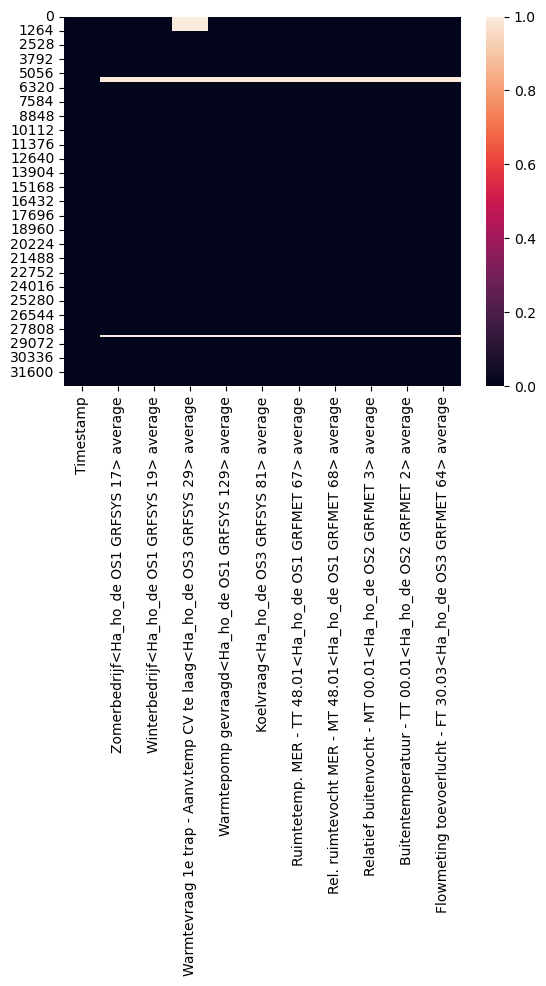

In [12]:
sns.heatmap(dft.isna(), cbar=True)
plt.show()

In [13]:
dft.count()

Timestamp                                                                     32853
Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average                                  32108
Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average                                 32108
Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average    30794
Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average                          32108
Koelvraag<Ha_ho_de OS3 GRFSYS 81> average                                     32108
Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average                    32108
Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average               32108
Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average                32108
Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average                   32108
Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average            32108
dtype: int64

----------------

In [14]:
dft.isna().sum()

Timestamp                                                                        0
Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average                                   745
Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average                                  745
Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average    2059
Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average                           745
Koelvraag<Ha_ho_de OS3 GRFSYS 81> average                                      745
Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average                     745
Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average                745
Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average                 745
Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average                    745
Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average             745
dtype: int64

Drop rows that contain at least 1 NaN value.

In [15]:
dft_clean = dft.dropna()

In [16]:
dft_clean.count()

Timestamp                                                                     30794
Zomerbedrijf<Ha_ho_de OS1 GRFSYS 17> average                                  30794
Winterbedrijf<Ha_ho_de OS1 GRFSYS 19> average                                 30794
Warmtevraag 1e trap - Aanv.temp CV te laag<Ha_ho_de OS3 GRFSYS 29> average    30794
Warmtepomp gevraagd<Ha_ho_de OS1 GRFSYS 129> average                          30794
Koelvraag<Ha_ho_de OS3 GRFSYS 81> average                                     30794
Ruimtetemp. MER - TT 48.01<Ha_ho_de OS1 GRFMET 67> average                    30794
Rel. ruimtevocht MER - MT 48.01<Ha_ho_de OS1 GRFMET 68> average               30794
Relatief buitenvocht - MT 00.01<Ha_ho_de OS2 GRFMET 3> average                30794
Buitentemperatuur - TT 00.01<Ha_ho_de OS2 GRFMET 2> average                   30794
Flowmeting toevoerlucht - FT 30.03<Ha_ho_de OS3 GRFMET 64> average            30794
dtype: int64

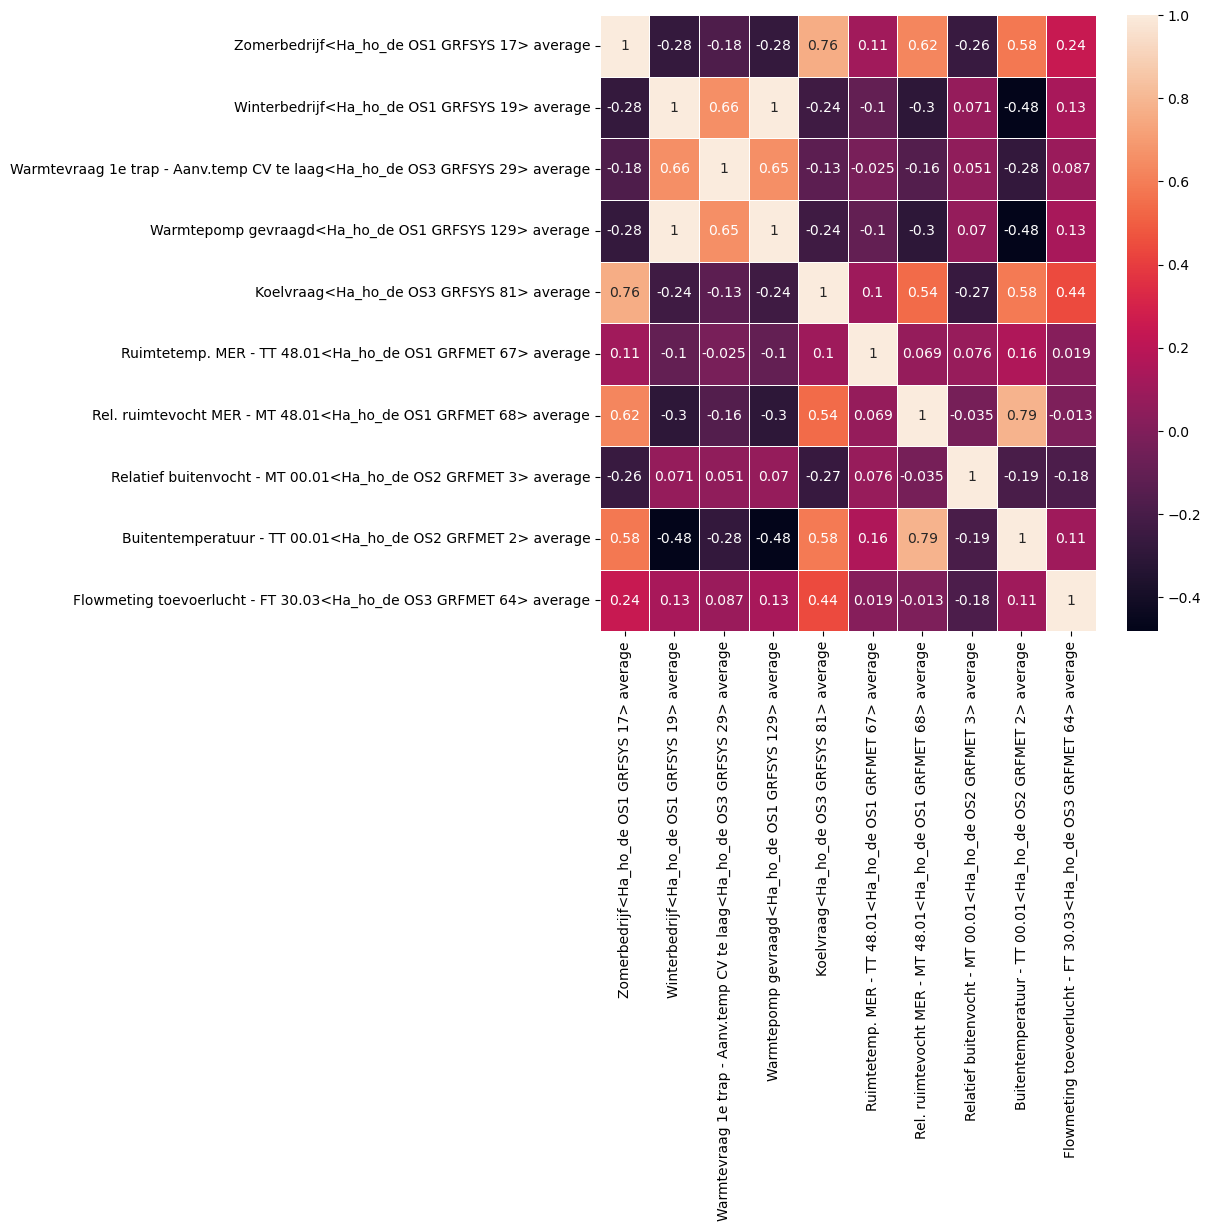

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dft_clean.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [18]:
# Add 'Index' and 'Group' columns for usage in the framework solution
dft_clean['Index'] = np.arange(dft_clean.shape[0])
dft_clean['Group'] = 0

<ipython-input-18-da1ecef96007>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_clean['Index'] = np.arange(dft_clean.shape[0])
<ipython-input-18-da1ecef96007>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_clean['Group'] = 0


Apply column renaming to consistent and usable names

In [23]:
dft_clean = dft_clean.rename(columns={ 
    dft_clean.columns[1]: "Zomerbedrijf",
    dft_clean.columns[2]: "Winterbedrijf",
    dft_clean.columns[3]: "Warmteaanvraag",
    dft_clean.columns[4]: "Warmtepompvraag",
    dft_clean.columns[5]: "Koelvraag",
    dft_clean.columns[6]: "Ruimtetemp",
    dft_clean.columns[7]: "Rel_Ruimtevocht",
    dft_clean.columns[8]: "Rel_Buitenvocht",
    dft_clean.columns[9]: "Buitentemperatuur",
    dft_clean.columns[10]: "Flowmetingen_toevoerlucht",
})

In [24]:
dft_clean.head()

,Timestamp,Zomerbedrijf,Winterbedrijf,Warmteaanvraag,Warmtepompvraag,Koelvraag,Ruimtetemp,Rel_Ruimtevocht,Rel_Buitenvocht,Buitentemperatuur,Flowmetingen_toevoerlucht,Index,Group
1314,2013-01-15 14:24:00,0.0,1.0,0.0,1.0,0.0,205.0,453.0,851.0,-9.0,24.0,0,0
1315,2013-01-15 14:40:00,0.0,1.0,0.0,1.0,0.0,203.0,473.0,859.0,-9.0,24.0,1,0
1316,2013-01-15 14:56:00,0.0,1.0,0.0,1.0,0.0,205.0,452.0,871.0,-7.0,25.0,2,0
1317,2013-01-15 15:12:00,0.0,1.0,0.0,1.0,0.0,204.0,450.0,872.0,-8.0,25.0,3,0
1318,2013-01-15 15:28:00,0.0,1.0,0.0,1.0,0.0,204.0,455.0,859.0,-8.0,24.0,4,0


In [27]:
dft_clean.columns

Index(['Timestamp', 'Zomerbedrijf', 'Winterbedrijf', 'Warmteaanvraag',
       'Warmtepompvraag', 'Koelvraag', 'Ruimtetemp', 'Rel_Ruimtevocht',
       'Rel_Buitenvocht', 'Buitentemperatuur', 'Flowmetingen_toevoerlucht',
       'Index', 'Group'],
      dtype='object')

In [25]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30794 entries, 1314 to 32852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  30794 non-null  object 
 1   Zomerbedrijf               30794 non-null  float64
 2   Winterbedrijf              30794 non-null  float64
 3   Warmteaanvraag             30794 non-null  float64
 4   Warmtepompvraag            30794 non-null  float64
 5   Koelvraag                  30794 non-null  float64
 6   Ruimtetemp                 30794 non-null  float64
 7   Rel_Ruimtevocht            30794 non-null  float64
 8   Rel_Buitenvocht            30794 non-null  float64
 9   Buitentemperatuur          30794 non-null  float64
 10  Flowmetingen_toevoerlucht  30794 non-null  float64
 11  Index                      30794 non-null  int32  
 12  Group                      30794 non-null  int64  
dtypes: float64(10), int32(1), int64(1), object(

Export to .csv file

In [26]:
dft_clean.to_csv('../out/2013_HHS_Delft_priva_16min_clean.csv')